In [1]:
from osgeo import gdal

Driver: ENVI/ENVI .hdr Labelled
Size is 250 x 14678 x 256
Projection is 


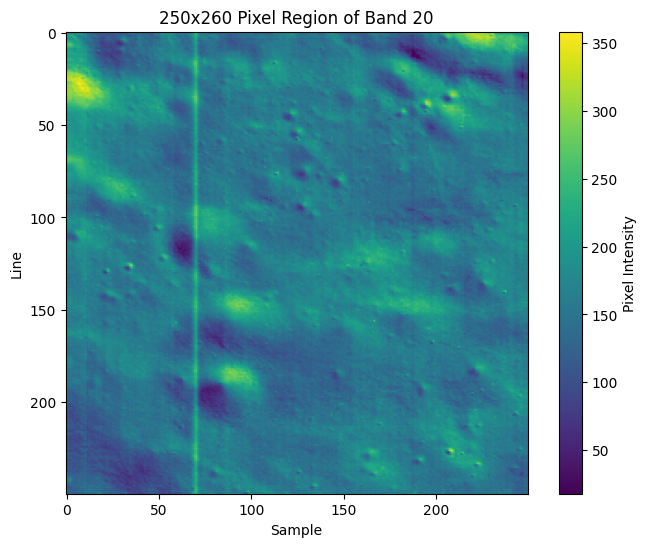

In [4]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

# Path to your QUB file
qub_file_path = r"D:\Antariksh\ch2_data\data\calibrated\20240131\ch2_iir_nci_20240131T2241351052_d_img_d18.qub"

# Open the QUB file using GDAL
dataset = gdal.Open(qub_file_path, gdal.GA_ReadOnly)
    
if not dataset:
    print("Failed to open file!")
    exit()

# Print some information about the file
print("Driver: {}/{}".format(dataset.GetDriver().ShortName, dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize, dataset.RasterYSize, dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))

# Read band 20 (1-based index, so band 20 is at index 19)
band_index = 19
band = dataset.GetRasterBand(band_index + 1)

# Read the band data as a numpy array
band20_data = band.ReadAsArray()

# Define the region of interest (250x250 pixels) (Enter the parameters)
start_line = 0
end_line = start_line + 250
start_sample = 0
end_sample = start_sample + 260

# Extract the region of interest from band 20 data
region_of_interest = band20_data[start_line:end_line, start_sample:end_sample]

# Display the region of interest
plt.figure(figsize=(8, 6))
plt.imshow(region_of_interest)
plt.colorbar(label='Pixel Intensity')
plt.title('250x260 Pixel Region of Band 20')
plt.xlabel('Sample')
plt.ylabel('Line')
plt.show()


     Spectral Channel     Radiance
0                   1   788.654541
1                   2   898.201904
2                   3  1007.749268
3                   4  1117.296631
4                   5  1281.617676
..                ...          ...
251               252   291.834534
252               253   325.862823
253               254   332.809265
254               255   376.905273
255               256   410.933533

[256 rows x 2 columns]


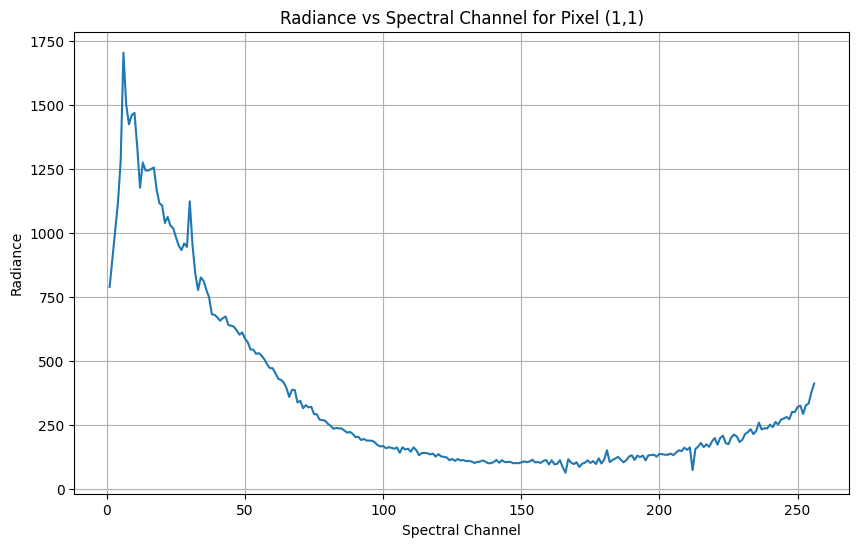

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Path to the QUB file
qub_file_path = "D:/Antariksh/ch2_data/data/calibrated/20240131/ch2_iir_nci_20240131T2241351052_d_img_d18.qub"

# Open the QUB file
dataset = gdal.Open(qub_file_path, gdal.GA_ReadOnly)

if not dataset:
    print("Failed to open file!")
    exit()

# Get the number of bands
num_bands = dataset.RasterCount

# Coordinates of the pixel (1,1)
x, y = 0, 0

# Initialize an array to store the spectral data
spectral_data = []

# Loop through each band and extract the value for the specified pixel
for band_index in range(num_bands):
    band = dataset.GetRasterBand(band_index + 1)
    pixel_value = band.ReadAsArray(x, y, 1, 1)[0, 0]
    spectral_data.append(pixel_value)

# Convert spectral data to a numpy array
spectral_data = np.array(spectral_data)

# Create a DataFrame for the spectral data
df = pd.DataFrame({
    'Spectral Channel': range(1, num_bands + 1),
    'Radiance': spectral_data
})

# Display the DataFrame
print(df)

# Plot the radiance vs spectral channel
plt.figure(figsize=(10, 6))
plt.plot(df['Spectral Channel'], df['Radiance'])
plt.title('Radiance vs Spectral Channel for Pixel (1,1)')
plt.xlabel('Spectral Channel')
plt.ylabel('Radiance')
plt.grid(True)
plt.show()


     Wavelength (nm)     Radiance
0              712.3   788.654541
1              729.2   898.201904
2              746.0  1007.749268
3              762.9  1117.296631
4              779.7  1281.617676
..               ...          ...
251           4942.3   291.834534
252           4959.1   325.862823
253           4976.0   332.809265
254           4992.8   376.905273
255           5009.7   410.933533

[256 rows x 2 columns]


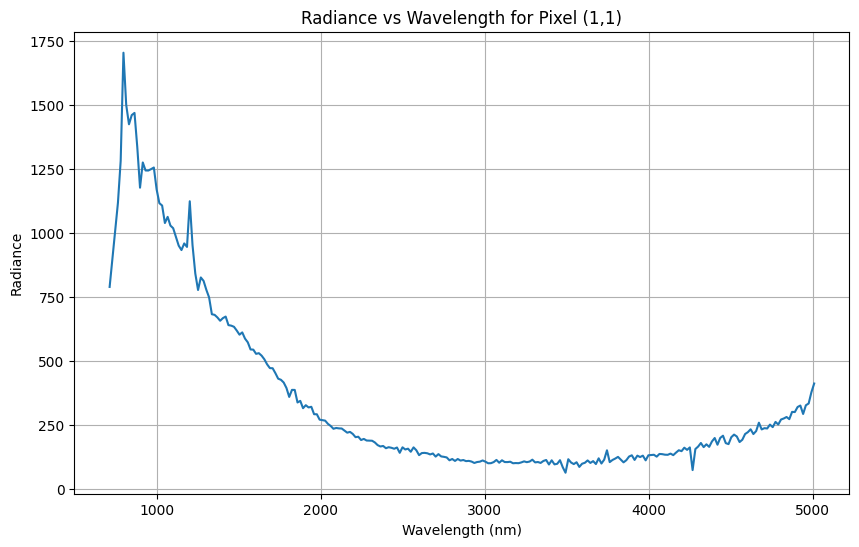

In [8]:
qub_file_path = "D:/Antariksh/ch2_data/data/calibrated/20240131/ch2_iir_nci_20240131T2241351052_d_img_d18.qub"

# Open the QUB file
dataset = gdal.Open(qub_file_path, gdal.GA_ReadOnly)

if not dataset:
    print("Failed to open file!")
    exit()

# Get the number of bands
num_bands = dataset.RasterCount

# Coordinates of the pixel (1,1)
x, y = 0, 0

# Initialize an array to store the spectral data
spectral_data = []

# Loop through each band and extract the value for the specified pixel
for band_index in range(num_bands):
    band = dataset.GetRasterBand(band_index + 1)
    pixel_value = band.ReadAsArray(x, y, 1, 1)[0, 0]
    spectral_data.append(pixel_value)

# Convert spectral data to a numpy array
spectral_data = np.array(spectral_data)

# Create a DataFrame for the spectral data
df = pd.DataFrame({
    'Wavelength (nm)': [band_info[i]['Center Wavelength (nm)'] for i in range(1, num_bands + 1)],
    'Radiance': spectral_data
})

# Display the DataFrame
print(df)

# Plot the radiance vs wavelength
plt.figure(figsize=(10, 6))
plt.plot(df['Wavelength (nm)'], df['Radiance'])
plt.title('Radiance vs Wavelength for Pixel (1,1)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Radiance')
plt.grid(True)
plt.show()


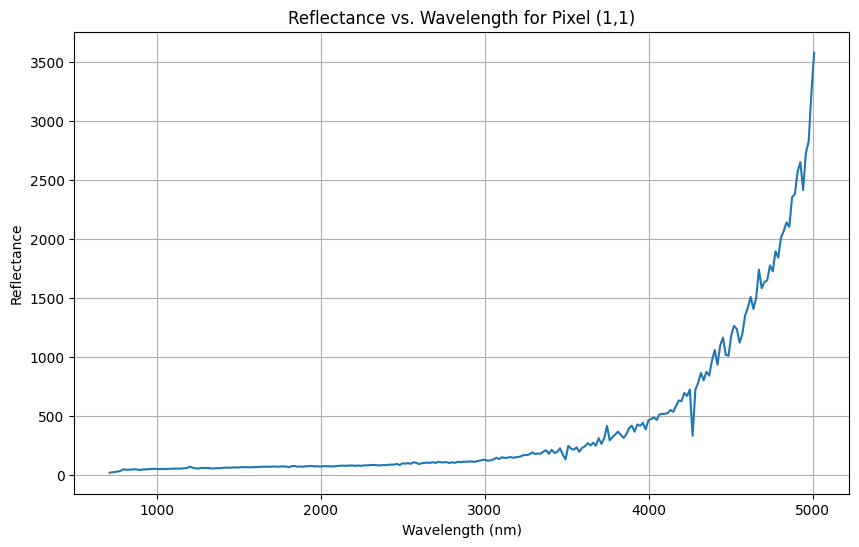

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from tabulate import tabulate
import math
import pandas as pd
# File paths
s1_path = "D:\\Antariksh\\ch2_data\\data\\calibrated\\20240131\\ch2_iir_nci_20240131T2241351052_d_img_d18.qub"
s2_path = "D:\\Antariksh\\extra_data_IIRS\\iir\\miscellaneous\\ch2_iirs_solar_flux.txt"

# Load the radiance data (s1) using GDAL
s1_dataset = gdal.Open(s1_path)
if s1_dataset is None:
    raise OSError("Unable to open the radiance file.")
s1 = s1_dataset.ReadAsArray()

# Load the solar irradiance data (s2)
s2_data = np.loadtxt(s2_path)

# Split the solar irradiance data into wavelengths and irradiance values
wavelengths = s2_data[:, 0]
s2 = s2_data[:, 1]

# Assuming `dpi` is provided or calculated elsewhere
dpi = math.pi  # Replace with the actual distance value if available

# Constant factor
constant_factor = 0.986161140705

# Calculate reflectance
reflectance = (s1 * dpi * (constant_factor ** 2)) / s2[:, np.newaxis, np.newaxis]

# Extract reflectance for pixel (0,0)
pixel_reflectance = reflectance[:, 0, 0]

# Plot Reflectance vs. Wavelength for pixel (0,0)
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, pixel_reflectance, linestyle='-')
plt.title('Reflectance vs. Wavelength for Pixel (1,1)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.grid(True)
plt.show()

# Create a table of values
table = np.column_stack((wavelengths, pixel_reflectance))
# Close the dataset
s1_dataset = None


In [12]:
import csv



# Open the CSV file in write mode with appropriate encoding (e.g., UTF-8 for non-ASCII characters)
with open("reflectance_data.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row (optional)
    writer.writerow(["Wavelength", "Reflectance"])  # Replace with your column names

    # Write each row of data to the CSV file
    writer.writerows(table)

print("Data successfully written to CSV file!")


Data successfully written to CSV file!
